In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Read csv

In [2]:
df = pd.read_csv("data.csv")

pop_keys = ['มีผลต่อหัวใจ', 'นี่ฉันเอง', 'เสี่ยว']
rock_keys = ['น้องเปิ้ล', 'แดงกับเขียว ', 'สายล่อฟ้า']
hiphop_keys = ['FHERO', 'Love The Way You Lie', 'Turn Down for What']
edm_keys = ['Voodoo', 'If ItAin\'t Dutch', 'Anubis']

df['avg_pop'] = df[pop_keys].mean(axis=1).round(0).astype(int)
df['avg_rock'] = df[rock_keys].mean(axis=1).round(0).astype(int)
df['avg_hiphop'] = df[hiphop_keys].mean(axis=1).round(0).astype(int)
df['avg_edm'] = df[edm_keys].mean(axis=1).round(0).astype(int)

# df.loc[df['age23'] == 1, 'age22'] = 1

age_keys = ['age21', 'age22']
hour_keys = ['<0.5hrs', '0.5-1hrs', '1-2Hrs', '2-3hrs', '>3hrs']
avg_keys = ['avg_pop', 'avg_rock', 'avg_hiphop', 'avg_edm']

df[age_keys + hour_keys+ avg_keys]

,age21,age22,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs,avg_pop,avg_rock,avg_hiphop,avg_edm
0,1,0,0,0,0,0,1,70,87,77,83
1,0,1,0,0,1,0,0,87,80,77,83
2,1,0,0,0,0,0,1,100,87,100,90
3,0,0,1,0,0,0,0,93,100,83,80
4,0,1,0,0,1,0,0,100,100,100,73
5,0,1,1,0,0,0,0,100,100,93,40
6,1,0,0,1,0,0,0,90,80,90,87
7,1,0,0,1,0,0,0,100,90,100,80
8,1,0,0,0,0,1,0,97,67,83,63
9,1,0,0,0,0,0,1,97,60,97,93


## Hour

In [3]:
hour = df[hour_keys]
hour

,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
5,1,0,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,0,1,0
9,0,0,0,0,1


([<matplotlib.patches.Wedge at 0x7fd9d82e4510>,
 [Text(0.9801071672559598, 0.4993895680663527, '<0.5hrs'),
  Text(0.33991864973549485, 1.0461621822461364, '0.5-1hrs'),
  Text(-0.9801071906340715, 0.49938952218422455, '1-2Hrs'),
  Text(-0.7778174502021367, -0.7778174684082678, '2-3hrs'),
  Text(0.4993895451252883, -0.9801071789450161, '>3hrs')],
 [Text(0.5346039094123416, 0.2723943098543742, '15.0%'),
  Text(0.1854101725829972, 0.5706339175888016, '10.0%'),
  Text(-0.534603922164039, 0.2723942848277588, '35.0%'),
  Text(-0.42426406374661996, -0.42426407367723695, '5.0%'),
  Text(0.27239429734106635, -0.5346039157881906, '35.0%')])

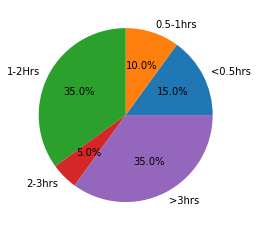

In [4]:
plt.pie(hour.sum(), labels=hour.keys(), autopct='%1.1f%%')

## Avg by music

/home/j/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/j/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3637 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/j/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3612 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/j/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3621 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/j/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3605 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/j/.local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3656 missing from current

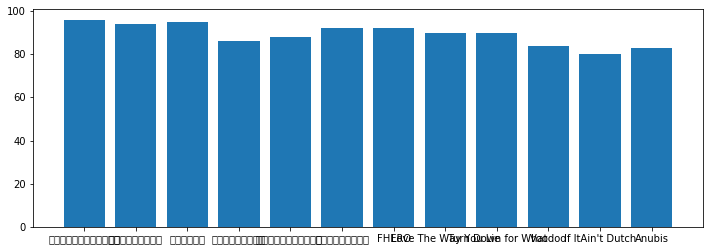

In [5]:
music = pop_keys + rock_keys + hiphop_keys + edm_keys
avg_music = df[music].mean().round(0).astype(int)

plt.figure(figsize=[12,4])
plt.bar(avg_music.keys(), avg_music)

## Avg by genres

<BarContainer object of 4 artists>

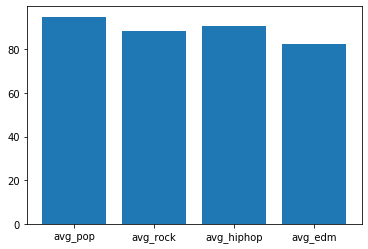

In [6]:
avg = df[avg_keys]
plt.bar(avg.keys(), avg.mean())

In [7]:
avg_scaler = avg
avg_scaler.loc[:,:] = MinMaxScaler().fit_transform(avg_scaler)

avg_scaler

/home/j/.local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,avg_pop,avg_rock,avg_hiphop,avg_edm
0,0.000000,0.675,0.000000,0.716667
1,0.566667,0.500,0.000000,0.716667
2,1.000000,0.675,1.000000,0.833333
3,0.766667,1.000,0.260870,0.666667
4,1.000000,1.000,1.000000,0.550000
5,1.000000,1.000,0.695652,0.000000
6,0.666667,0.500,0.565217,0.783333
7,1.000000,0.750,1.000000,0.666667
8,0.900000,0.175,0.260870,0.383333
9,0.900000,0.000,0.869565,0.883333


## Clustering

In [8]:
km = KMeans(2)
km.fit(avg_scaler)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

(1, 0)

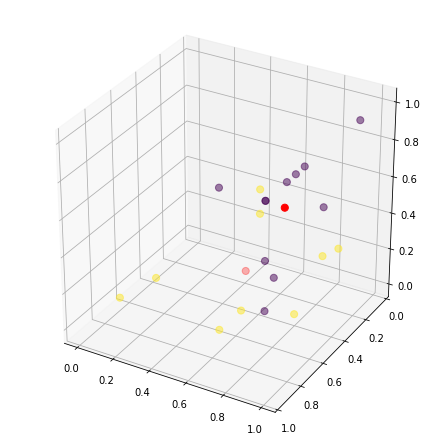

In [9]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg_scaler['avg_pop'], avg_scaler['avg_rock'], avg_scaler['avg_hiphop'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], c='red', s=50)
ax.set_ylim3d(1,0)

(1, 0)

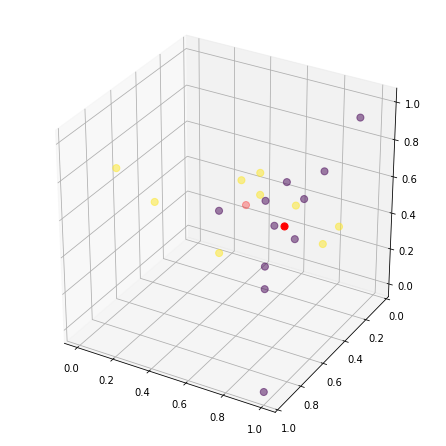

In [10]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg_scaler['avg_pop'], avg_scaler['avg_rock'], avg_scaler['avg_edm'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], km.cluster_centers_[:, 3], c='red', s=50)
ax.set_ylim3d(1,0)

(1, 0)

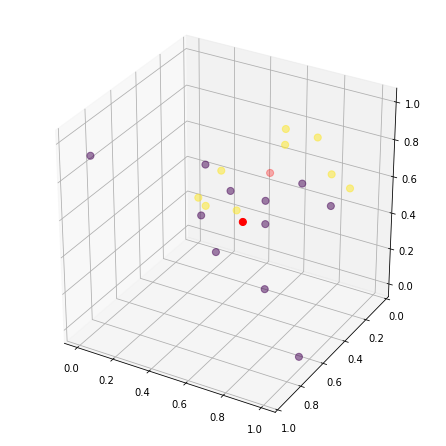

In [11]:
plt.figure(figsize=[6,6])
ax = plt.axes([0,0,1,1],projection='3d')
ax.scatter(avg_scaler['avg_rock'], avg_scaler['avg_hiphop'], avg_scaler['avg_edm'], c= km.labels_.astype(float), s=50, alpha=0.5)
ax.scatter(km.cluster_centers_[:, 1], km.cluster_centers_[:, 2], km.cluster_centers_[:, 3], c='red', s=50)
ax.set_ylim3d(1,0)

In [12]:
show = df[age_keys + hour_keys+ avg_keys]
show['y_hat'] = km.labels_
show.sort_values('y_hat')

/home/j/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age21,age22,<0.5hrs,0.5-1hrs,1-2Hrs,2-3hrs,>3hrs,avg_pop,avg_rock,avg_hiphop,avg_edm,y_hat
9,1,0,0,0,0,0,1,97,60,97,93,0
16,0,1,0,0,1,0,0,100,100,87,80,0
14,0,1,0,0,1,0,0,100,97,90,90,0
11,0,1,0,0,0,0,1,100,93,100,100,0
10,0,1,0,0,1,0,0,93,100,100,93,0
18,1,0,0,0,0,0,1,100,80,93,93,0
7,1,0,0,1,0,0,0,100,90,100,80,0
19,0,1,0,0,0,0,1,100,100,100,100,0
5,0,1,1,0,0,0,0,100,100,93,40,0
4,0,1,0,0,1,0,0,100,100,100,73,0


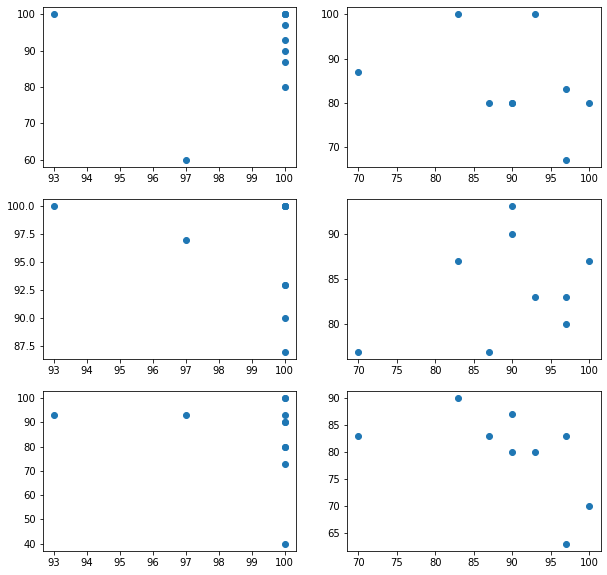

In [13]:
xs = show[show['y_hat']==0][avg_keys]
ys = show[show['y_hat']==1][avg_keys]

plt.figure(figsize=[10,10])
plt.subplot(321)
plt.plot( 'avg_pop', 'avg_rock', data=xs, marker='o', linewidth=0)
plt.subplot(322)
plt.plot( 'avg_pop', 'avg_rock', data=ys, marker='o', linewidth=0)

plt.subplot(323)
plt.plot( 'avg_pop', 'avg_hiphop', data=xs, marker='o', linewidth=0)
plt.subplot(324)
plt.plot( 'avg_pop', 'avg_hiphop', data=ys, marker='o', linewidth=0)

plt.subplot(325)
plt.plot( 'avg_pop', 'avg_edm', data=xs, marker='o', linewidth=0)
plt.subplot(326)
plt.plot( 'avg_pop', 'avg_edm', data=ys, marker='o', linewidth=0)

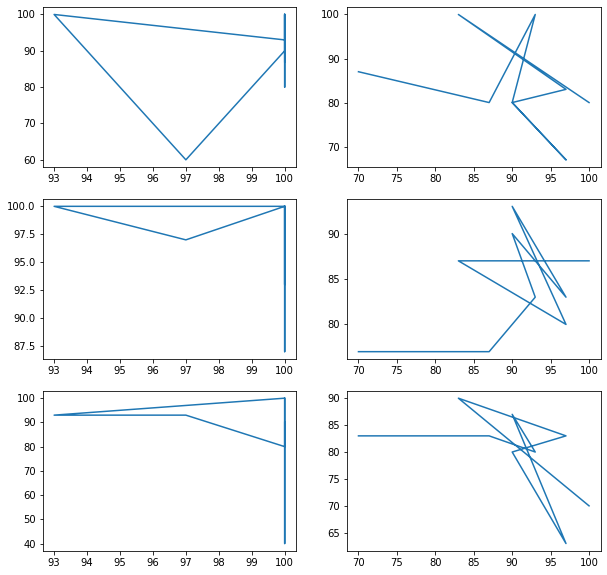

In [14]:
plt.figure(figsize=[10,10])
plt.subplot(321)
plt.plot( 'avg_pop', 'avg_rock', data=xs)
plt.subplot(322)
plt.plot( 'avg_pop', 'avg_rock', data=ys)

plt.subplot(323)
plt.plot( 'avg_pop', 'avg_hiphop', data=xs)
plt.subplot(324)
plt.plot( 'avg_pop', 'avg_hiphop', data=ys)

plt.subplot(325)
plt.plot( 'avg_pop', 'avg_edm', data=xs)
plt.subplot(326)
plt.plot( 'avg_pop', 'avg_edm', data=ys)

[Text(0, 0.5, 'volume (%)'), Text(0.5, 0, 'genre')]

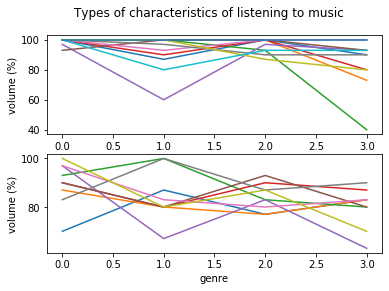

In [15]:
fig, axes = plt.subplots(2)
fig.suptitle("Types of characteristics of listening to music")

for i in xs.values: axes[0].plot(i)
for i in ys.values: axes[1].plot(i)

axes[0].set(xlabel="genre", ylabel="volume (%)")
axes[1].set(xlabel="genre", ylabel="volume (%)")